In [25]:
from pandas_datareader import data as web

In [26]:
import datetime

In [27]:
start = datetime.datetime(1998, 1, 1)
end = datetime.datetime(2021, 12, 31)
data = web.DataReader('DGS10', 'fred', start, end).dropna()

In [28]:
data

,DGS10
DATE,
1998-01-02,5.67
1998-01-05,5.52
1998-01-06,5.49
1998-01-07,5.55
1998-01-08,5.49
...,...
2021-12-27,1.48
2021-12-28,1.49
2021-12-29,1.55


In [29]:
# Convert to monthly data
monthly_data = data.resample('M').last()

# Calculate monthly returns
monthly_returns = (1 + monthly_data / 100) ** (1/12) - 1

# Calculate cumulative returns
cumulative_returns = (1 + monthly_returns).cumprod()

# You might want to subtract 1 to get the cumulative return in percentage
cumulative_returns = cumulative_returns - 1
cumulative_returns

,DGS10
DATE,
1998-01-31,0.004495
1998-02-28,0.009083
1998-03-31,0.013731
1998-04-30,0.018409
1998-05-31,0.023011
...,...
2021-08-31,1.208215
2021-09-30,1.210993
2021-10-31,1.213829


In [30]:
start = '1990-01-31'
end = '2021-12-31'

In [31]:
pip install pandas_datareader

^C
Note: you may need to restart the kernel to use updated packages.


In [32]:
from pandas_datareader import data as web

In [33]:
import pandas as pd
# FRED에서 데이터 가져오기
leadingIndicator = pd.read_csv('./leadingIndicator.csv')  # monthly 지표
leadingIndicator = leadingIndicator.set_index('DATE')
leadingIndicator.index = pd.to_datetime(leadingIndicator.index)

vix = pd.read_csv('./vix.csv')  # monthly 지표
vix = vix.set_index('DATE')
vix.index = pd.to_datetime(vix.index)

gdp_growth = web.DataReader('NAEXKP04USQ657S', 'fred', start, end)  # 분기별 실질 GDP 성장률

In [34]:
leadingIndicator

,USALOLITONOSTSAM
DATE,
1960-01-31,100.694793
1960-02-29,100.421437
1960-03-31,100.118775
1960-04-30,99.832664
1960-05-31,99.582618
...,...
2023-05-31,99.093665
2023-06-30,99.196542
2023-07-31,99.301570


In [35]:
vix

,VIXCLS
DATE,
1990-01-31,23.347273
1990-02-28,23.262632
1990-03-31,20.062273
1990-04-30,21.403500
1990-05-31,18.097727
...,...
2023-07-31,13.932381
2023-08-31,15.853913
2023-09-30,15.173333


In [36]:
gdp_growth

,NAEXKP04USQ657S
DATE,
1990-04-01,-1.878177
1990-07-01,-0.860479
1990-10-01,-1.868745
1991-01-01,-3.203971
1991-04-01,0.279720
...,...
2020-10-01,3.179833
2021-01-01,1.539630
2021-04-01,0.921680


In [37]:
gdp_growth_monthly = gdp_growth.resample('M').ffill(limit=3)  # 분기 데이터를 월별로 전달
gdp_growth_monthly

,NAEXKP04USQ657S
DATE,
1990-04-30,-1.878177
1990-05-31,-1.878177
1990-06-30,-1.878177
1990-07-31,-0.860479
1990-08-31,-0.860479
...,...
2021-06-30,0.921680
2021-07-31,-0.563895
2021-08-31,-0.563895


In [38]:
import pandas as pd

# indicator & vix & gdp 합치기
table = pd.concat([leadingIndicator, vix, gdp_growth_monthly], axis=1, join='inner')
table.columns = ['leadingIndicator', 'vix', 'gdp']
table

,leadingIndicator,vix,gdp
DATE,,,
1990-04-30,99.773369,21.403500,-1.878177
1990-05-31,99.618592,18.097727,-1.878177
1990-06-30,99.359537,16.822381,-1.878177
1990-07-31,99.001386,18.392857,-0.860479
1990-08-31,98.572405,28.175217,-0.860479
...,...,...,...
2021-06-30,101.172892,16.956818,0.921680
2021-07-31,101.129863,17.603333,-0.563895
2021-08-31,101.067557,17.472727,-0.563895


In [39]:
import matplotlib.pyplot as plt

In [40]:
# leading indicator

# leading indicator mean
leadingIndicator_mean = table['leadingIndicator'].mean()

# 구간을 저장할 리스트
above_average_periods = []
below_average_periods = []

# 현재 구간의 시작 날짜와 끝 날짜를 추적하기 위한 변수 초기화
current_start = None
current_end = None
current_status_above = None

# 데이터프레임 순회
for date, value in table['leadingIndicator'].items():
    # 현재 상태가 설정되지 않았거나 상태가 변경된 경우
    if current_status_above is None or (value > leadingIndicator_mean) != current_status_above:
        # 현재 구간의 시작과 끝 날짜가 존재하는 경우, 리스트에 추가
        if current_start is not None and current_end is not None:
            if current_status_above:
                above_average_periods.append((current_start, current_end))
            else:
                below_average_periods.append((current_start, current_end))

        # 새로운 구간의 시작 날짜 설정
        current_start = date
        current_status_above = value > leadingIndicator_mean

    # 현재 구간의 끝 날짜 업데이트
    current_end = date

# 마지막 구간 추가
if current_status_above:
    above_average_periods.append((current_start, current_end))
else:
    below_average_periods.append((current_start, current_end))


# 결과 출력 - 평균 이상
above_average = []
for start, end in above_average_periods:
    above_average.append(f"{start.strftime('%Y-%m-%d')} ~ {end.strftime('%Y-%m-%d')}")
print("평균 이상인 구간:", above_average)

# 결과 출력 - 평균 이하
below_average = []
for start, end in below_average_periods:
    below_average.append(f"{start.strftime('%Y-%m-%d')} ~ {end.strftime('%Y-%m-%d')}")
print("\n평균 이하인 구간:", below_average)

평균 이상인 구간: ['1992-10-31 ~ 1993-04-30', '1993-10-31 ~ 1995-02-28', '1996-11-30 ~ 1998-08-31', '1998-11-30 ~ 2000-10-31', '2003-10-31 ~ 2008-06-30', '2010-11-30 ~ 2011-06-30', '2012-02-29 ~ 2012-05-31', '2012-11-30 ~ 2015-08-31', '2017-01-31 ~ 2018-12-31', '2020-12-31 ~ 2021-10-31']

평균 이하인 구간: ['1990-04-30 ~ 1992-09-30', '1993-05-31 ~ 1993-09-30', '1995-03-31 ~ 1996-10-31', '1998-09-30 ~ 1998-10-31', '2000-11-30 ~ 2003-09-30', '2008-07-31 ~ 2010-10-31', '2011-07-31 ~ 2012-01-31', '2012-06-30 ~ 2012-10-31', '2015-09-30 ~ 2016-12-31', '2019-01-31 ~ 2020-11-30']


In [41]:
# vix

# 120일 이동평균 계산
table['vix_120d_ma'] = table['vix'].rolling(window=20).mean()

# 구간을 저장할 리스트 초기화
increasing_periods = []
decreasing_periods = []

# 현재 구간의 시작 날짜와 끝 날짜를 추적하기 위한 변수 초기화
current_start = None
current_end = None
current_trend_increasing = None

# 데이터프레임 순회
for date, row in table.iterrows():
    value = row['vix']
    moving_average = row['vix_120d_ma']
    
    # 이동 평균과 비교
    if moving_average is not None:
        # 현재 상태가 설정되지 않았거나 상태가 변경된 경우
        if current_trend_increasing is None or (value < moving_average) != current_trend_increasing:
            # 현재 구간의 시작과 끝 날짜가 존재하는 경우, 리스트에 추가
            if current_start is not None and current_end is not None:
                if current_trend_increasing:
                    increasing_periods.append((current_start, current_end))
                else:
                    decreasing_periods.append((current_start, current_end))

            # 새로운 구간의 시작 날짜 설정
            current_start = date
            current_trend_increasing = value < moving_average

        # 현재 구간의 끝 날짜 업데이트
        current_end = date

# 마지막 구간 추가
if current_trend_increasing:
    increasing_periods.append((current_start, current_end))
else:
    decreasing_periods.append((current_start, current_end))

# 결과 출력 - 상승 구간
increasing = []
for start, end in increasing_periods:
    increasing.append(f"{start.strftime('%Y-%m-%d')} ~ {end.strftime('%Y-%m-%d')}")
print("상승 중인 구간:", increasing)

# 결과 출력 - 하락 구간
decreasing = []
for start, end in decreasing_periods:
    decreasing.append(f"{start.strftime('%Y-%m-%d')} ~ {end.strftime('%Y-%m-%d')}")
print("\n하락 중인 구간:", decreasing)

상승 중인 구간: ['1991-11-30 ~ 1992-09-30', '1992-11-30 ~ 1993-10-31', '1993-12-31 ~ 1994-01-31', '1994-07-31 ~ 1994-08-31', '1995-01-31 ~ 1995-09-30', '1995-11-30 ~ 1995-12-31', '1998-02-28 ~ 1998-03-31', '1998-05-31 ~ 1998-05-31', '1998-07-31 ~ 1998-07-31', '1999-03-31 ~ 1999-04-30', '1999-06-30 ~ 2000-03-31', '2000-06-30 ~ 2000-09-30', '2001-05-31 ~ 2001-08-31', '2001-12-31 ~ 2002-05-31', '2003-04-30 ~ 2005-09-30', '2005-11-30 ~ 2006-04-30', '2006-09-30 ~ 2007-02-28', '2009-05-31 ~ 2011-07-31', '2012-01-31 ~ 2014-01-31', '2014-04-30 ~ 2014-09-30', '2014-11-30 ~ 2014-11-30', '2015-04-30 ~ 2015-07-31', '2016-03-31 ~ 2016-05-31', '2016-07-31 ~ 2018-01-31', '2018-08-31 ~ 2018-09-30', '2019-03-31 ~ 2019-04-30', '2019-07-31 ~ 2019-07-31', '2019-09-30 ~ 2020-01-31', '2020-12-31 ~ 2020-12-31', '2021-02-28 ~ 2021-10-31']

하락 중인 구간: ['1990-04-30 ~ 1991-10-31', '1992-10-31 ~ 1992-10-31', '1993-11-30 ~ 1993-11-30', '1994-02-28 ~ 1994-06-30', '1994-09-30 ~ 1994-12-31', '1995-10-31 ~ 1995-10-31', '1996

In [44]:
# regime을 t+1 구간에 반영
from datetime import datetime, timedelta

# Function to shift dates by one month
def shift_dates(date_ranges):
    shifted_ranges = []
    for date_range in date_ranges:
        start_date_str, end_date_str = date_range.split(' ~ ')
        start_date = datetime.strptime(start_date_str, '%Y-%m-%d') + timedelta(days=30)  # Adding 30 days
        end_date = datetime.strptime(end_date_str, '%Y-%m-%d') + timedelta(days=30)    # Adding 30 days
        shifted_ranges.append(f'{start_date.strftime("%Y-%m-%d")} ~ {end_date.strftime("%Y-%m-%d")}')
    return shifted_ranges

above_average = shift_dates(above_average)
below_average = shift_dates(below_average)
increasing = shift_dates(increasing)
decreasing = shift_dates(decreasing)


In [45]:
print('평균 이상인 구간 :', above_average)
print('평균 이하인 구간 :', below_average)
print('상승 중인 구간 :', increasing)
print('하락 중인 구간 :', decreasing)

평균 이상인 구간 : ['1993-01-29 ~ 1993-07-29', '1994-01-29 ~ 1995-05-29', '1997-02-28 ~ 1998-11-29', '1999-02-28 ~ 2001-01-29', '2004-01-29 ~ 2008-09-28', '2011-02-28 ~ 2011-09-28', '2012-05-29 ~ 2012-08-29', '2013-02-28 ~ 2015-11-29', '2017-05-01 ~ 2019-03-31', '2021-03-31 ~ 2022-01-29']
평균 이하인 구간 : ['1990-05-30 ~ 1992-10-30', '1993-06-30 ~ 1993-10-30', '1995-04-30 ~ 1996-11-30', '1998-10-30 ~ 1998-11-30', '2000-12-30 ~ 2003-10-30', '2008-08-30 ~ 2010-11-30', '2011-08-30 ~ 2012-03-01', '2012-07-30 ~ 2012-11-30', '2015-10-30 ~ 2017-01-30', '2019-03-02 ~ 2020-12-30']
상승 중인 구간 : ['1991-12-30 ~ 1992-10-30', '1992-12-30 ~ 1993-11-30', '1994-01-30 ~ 1994-03-02', '1994-08-30 ~ 1994-09-30', '1995-03-02 ~ 1995-10-30', '1995-12-30 ~ 1996-01-30', '1998-03-30 ~ 1998-04-30', '1998-06-30 ~ 1998-06-30', '1998-08-30 ~ 1998-08-30', '1999-04-30 ~ 1999-05-30', '1999-07-30 ~ 2000-04-30', '2000-07-30 ~ 2000-10-30', '2001-06-30 ~ 2001-09-30', '2002-01-30 ~ 2002-06-30', '2003-05-30 ~ 2005-10-30', '2005-12-30 ~ 200

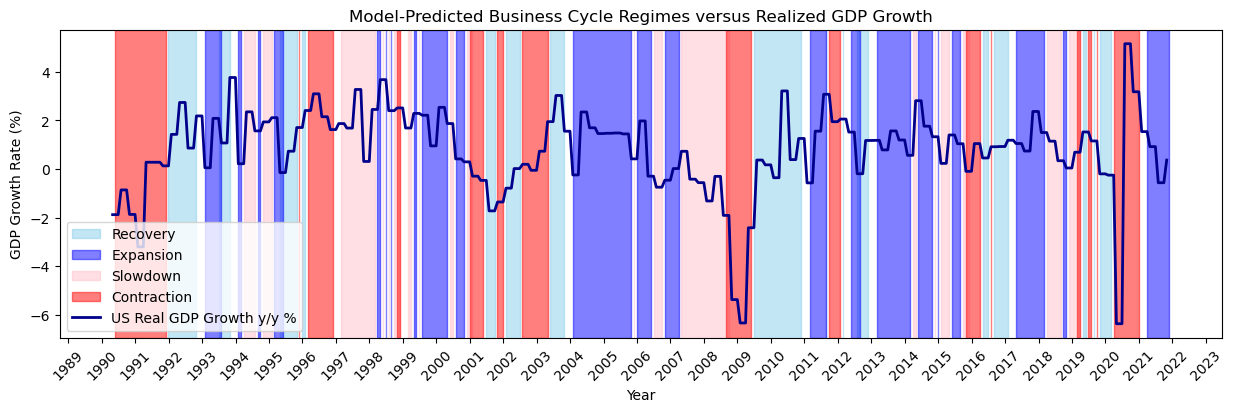

In [46]:
import matplotlib.dates as mdates

# 위에서 제공된 리스트를 이용하여 datetime 범위로 파싱
def parse_date_ranges(date_ranges):
    return [(pd.to_datetime(start), pd.to_datetime(end)) for start, end in (s.split(' ~ ') for s in date_ranges)]

# 위에서 제공된 날짜 범위 문자열을 datetime 객체의 리스트로 파싱
above_average_periods = parse_date_ranges(above_average)
below_average_periods = parse_date_ranges(below_average)
increasing_periods = parse_date_ranges(increasing)
decreasing_periods = parse_date_ranges(decreasing)

# 국면을 정의하는 함수
def get_regime_periods(above, below, increasing, decreasing):
    recovery = find_overlapping_periods(below, increasing)
    expansion = find_overlapping_periods(above, increasing)
    slowdown = find_overlapping_periods(above, decreasing)
    contraction = find_overlapping_periods(below, decreasing)
    return recovery, expansion, slowdown, contraction

# 겹치는 기간을 찾는 함수
def find_overlapping_periods(periods1, periods2):
    overlapping = []
    for start1, end1 in periods1:
        for start2, end2 in periods2:
            # 겹치는 기간 확인
            latest_start = max(start1, start2)
            earliest_end = min(end1, end2)
            if latest_start <= earliest_end:
                overlapping.append((latest_start, earliest_end))
    return overlapping

# 국면별 기간을 얻기
recovery_periods, expansion_periods, slowdown_periods, contraction_periods = get_regime_periods(
    above_average_periods, below_average_periods, increasing_periods, decreasing_periods)

# GDP 데이터 가져오기
gdp_growth = table['gdp']
# # GDP 성장률 계산 (월간 기준)
# gdp_growth = gdp_data.resample('M').last().pct_change().dropna() * 100

# 그래프 생성 및 국면별 배경색 추가
fig, ax = plt.subplots(figsize=(15, 4))

# 국면별 색상 지정
colors = {
    'Recovery': 'skyblue',
    'Expansion': 'blue',
    'Slowdown': 'pink',
    'Contraction': 'red'
}

# 국면 별로 배경색을 그래프에 추가
for period in recovery_periods:
    ax.axvspan(period[0], period[1], color=colors['Recovery'], alpha=0.5, label='Recovery' if 'Recovery' not in ax.get_legend_handles_labels()[1] else "")
for period in expansion_periods:
    ax.axvspan(period[0], period[1], color=colors['Expansion'], alpha=0.5, label='Expansion' if 'Expansion' not in ax.get_legend_handles_labels()[1] else "")
for period in slowdown_periods:
    ax.axvspan(period[0], period[1], color=colors['Slowdown'], alpha=0.5, label='Slowdown' if 'Slowdown' not in ax.get_legend_handles_labels()[1] else "")
for period in contraction_periods:
    ax.axvspan(period[0], period[1], color=colors['Contraction'], alpha=0.5, label='Contraction' if 'Contraction' not in ax.get_legend_handles_labels()[1] else "")

# GDP 성장률 선 그래프 추가
ax.plot(gdp_growth.index, gdp_growth, color='darkblue', label='US Real GDP Growth y/y %', linewidth=2)

# 범례 추가
ax.legend()

# 제목과 라벨 설정
ax.set_title('Model-Predicted Business Cycle Regimes versus Realized GDP Growth')
ax.set_xlabel('Year')
ax.set_ylabel('GDP Growth Rate (%)')

# x축을 연도로 표시
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# x축 라벨 각도 조절
plt.xticks(rotation=45)

# 그래프 표시
plt.show()


In [ ]:
# 이게 최종